In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [ ]:
#
# Load the California Housing dataset for training
#
bhd = fetch_california_housing()
df = pd.DataFrame(bhd.data)
df.columns = bhd.feature_names
df['AV_100K'] = bhd.target
print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  AV_100K  
0        -1

In [ ]:
#
# Select Avg. No of rooms per dwelling as feature
# and fit the model
#
X = df['AveRooms'].to_numpy().reshape(-1, 1)
y = df['AV_100K'].to_numpy().reshape(-1, 1)

In [ ]:
#
# Create an instance of RANSACRegressor
#
#Try residual_thresholds of 2, 5, 10

ransac = RANSACRegressor(base_estimator=LinearRegression(),
                         min_samples=50, max_trials=100,
                         random_state=42,
                         residual_threshold=2)

In [ ]:
#
# Fit the model
#
ransac.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


RANSACRegressor(base_estimator=LinearRegression(), estimator=LinearRegression(),
                min_samples=50, random_state=42, residual_threshold=2)

In [ ]:
#
# Get the Inlier mask; Create outlier mask
#
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

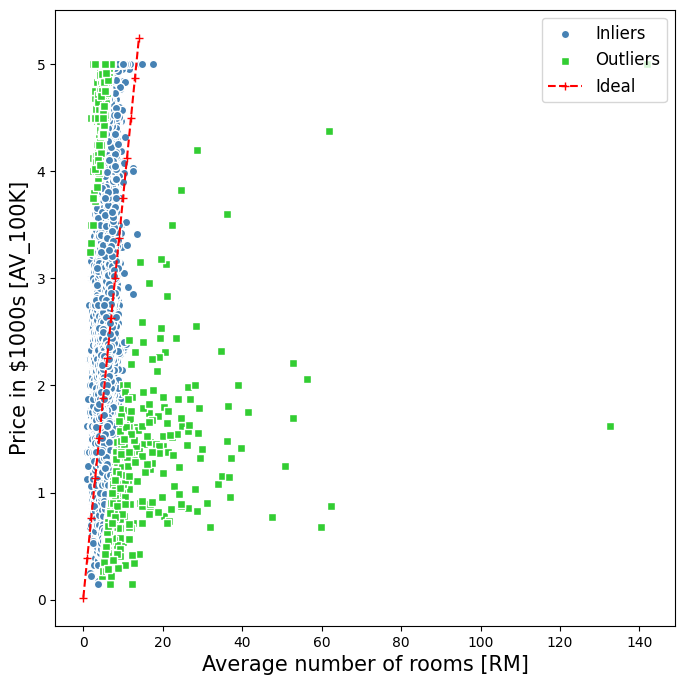

In [ ]:
#Draw
#
# Create scatter plot for inlier datset
#
plt.figure(figsize=(8, 8))
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')
#
# Create scatter plot for outlier datset
#
plt.scatter(X[outlier_mask], y[outlier_mask],
             c='limegreen', edgecolor='white',
             marker='s', label='Outliers')
#
# Draw the best fit line
#
line_X = np.arange(0, 15, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
#plt.plot(line_X, line_y_ransac, color='black', lw=2)

plt.plot(line_X, line_y_ransac, c='red', marker='+', linestyle= 'dashed', label='Ideal')

plt.xlabel('Average number of rooms [RM]', fontsize=15)
plt.ylabel('Price in $1000s [AV_100K]', fontsize=15)
plt.legend(loc='upper right', fontsize=12)
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error

class PolynomialRegression(object):
#See https://scikit-learn.org/stable/developers/develop.html for Sklearn estimator attributes and methods
#Attributes: degree, coeffs 
#Key methods: fit, predict, and score. 
    def __init__(self, degree=2):
        print(f"Degree: {degree}")
        self.degree = degree

    def fit(self, X, y):
        self.coeffs = np.polyfit(X.ravel(), y, self.degree)

    def get_params(self, deep=False):
        return {'degree': self.degree}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def predict(self, X):
        poly_eqn = np.poly1d(self.coeffs)
        y_hat = poly_eqn(X.ravel())
        return y_hat

    def score(self, X, y):
        return mean_squared_error(y, self.predict(X))


# Define the dataset
x = np.array([-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([132, 100, 72, 48, 80, 14, 3, -3, -5, -2, -20, 17, 33, 53, 78, 107, 140])

X = x.reshape(-1, 1)

ransac = RANSACRegressor(
    base_estimator=PolynomialRegression(degree=2),
    residual_threshold= 10,
    random_state=0,
    min_samples=6
)

ransac.fit(X, y)

# Print the coefficients of the fitted quadratic function
print("Coefficients of the fitted quadratic function using RANSAC:")
print(ransac.estimator_.coeffs)


Degree: 2
Degree: 2
Coefficients of the fitted quadratic function using RANSAC:
[ 2.20168149  0.50465825 -4.55078223]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(
